In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

from xgboost import XGBClassifier
from scipy.stats import randint, uniform

from fraud import collectAllFeaturesBaseline, collectAllFeaturesBaselineTest, merge_on, filter_feature_names_by_mi

df_fraud_aggregated_test = collectAllFeaturesBaselineTest()
df_fraud_aggregated = collectAllFeaturesBaseline()

          client_id  disrict  region  client_catg
0     test_Client_0       62     307           11
1     test_Client_1       69     103           11
2    test_Client_10       62     310           11
3   test_Client_100       60     101           11
4  test_Client_1000       62     301           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:683: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])
/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


           client_id  target  disrict  region  client_catg
0     train_Client_0     0.0       60     101           11
1     train_Client_1     0.0       69     107           11
2    train_Client_10     0.0       62     301           11
3   train_Client_100     0.0       69     105           11
4  train_Client_1000     0.0       62     303           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:683: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])


In [2]:
df_fraud_aggregated.head()

,client_id,target,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,...,f_client_tenure_days,f_counter_number_nunique,f_tarif_change_count,avg_consumption_per_month,remarque_frequency,avg_remarque_length,faulty_status_rate,f_t_region_fraud_rate,f_t_district_target_mean,f_t_client_catg_target_mean
0,train_Client_0,0.0,60,101,11,120.5,3.958607,0.329911,0,0,...,8844,1,1,78.419753,1.0,1.0,0.0,0.048237,0.035869,0.054687
1,train_Client_1,0.0,69,107,11,121.5,3.991459,0.332649,0,0,...,6152,1,1,128.931250,1.0,1.0,0.0,0.087543,0.071485,0.054687
2,train_Client_10,0.0,62,301,11,147.0,4.829172,0.402464,0,0,...,12103,1,1,129.801724,1.0,1.0,0.0,0.044247,0.051619,0.054687
3,train_Client_100,0.0,69,105,11,121.0,3.975033,0.331280,0,0,...,5920,1,1,0.285714,1.0,1.0,0.0,0.075455,0.071485,0.054687
4,train_Client_1000,0.0,62,303,11,124.0,4.073587,0.339493,0,0,...,1707,1,1,248.403846,1.0,1.0,0.0,0.083856,0.051619,0.054687


In [3]:
df_fraud_aggregated_test.head()

,client_id,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_median_billing_frequence_per,...,tarif_type,f_index_cons_error_sum,f_counter_statue_mean,f_client_tenure_days,f_counter_number_nunique,f_tarif_change_count,avg_consumption_per_month,remarque_frequency,avg_remarque_length,faulty_status_rate
0,test_Client_0,62,307,11,122.0,4.007884,0.334018,0,0,119.0,...,11,0,0.000000,6265,1,1,112.228395,1.0,1.0,0.0
1,test_Client_1,69,103,11,130.0,4.270696,0.355921,1,0,27.0,...,11,0,0.045455,3716,1,1,594.700000,1.0,1.0,0.0
2,test_Client_10,62,310,11,117.0,3.843627,0.320329,0,0,117.0,...,11,0,0.000000,5615,2,2,151.827703,1.0,1.0,0.0
3,test_Client_100,60,101,11,0.0,0.000000,0.000000,0,0,88.0,...,11,0,0.000000,7081,2,2,62.653846,1.0,1.0,0.0
4,test_Client_1000,62,301,11,117.0,3.843627,0.320329,1,0,97.0,...,11,116,0.094340,15448,3,2,164.945833,1.0,1.0,0.0


In [4]:
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test, df_fraud_aggregated, on="region", right_column="f_t_region_fraud_rate")
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test_merged, df_fraud_aggregated, on="disrict", right_column="f_t_district_target_mean")
df_fraud_aggregated_test_merged = merge_on(df_fraud_aggregated_test_merged, df_fraud_aggregated, on="client_catg", right_column="f_t_client_catg_target_mean")

In [5]:
df_fraud_aggregated_test_merged.head()

,client_id,disrict,region,client_catg,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_median_billing_frequence_per,...,f_client_tenure_days,f_counter_number_nunique,f_tarif_change_count,avg_consumption_per_month,remarque_frequency,avg_remarque_length,faulty_status_rate,f_t_region_fraud_rate,f_t_district_target_mean,f_t_client_catg_target_mean
0,test_Client_0,62,307,11,122.0,4.007884,0.334018,0,0,119.0,...,6265,1,1,112.228395,1.0,1.0,0.0,0.087968,0.051619,0.054687
1,test_Client_1,69,103,11,130.0,4.270696,0.355921,1,0,27.0,...,3716,1,1,594.700000,1.0,1.0,0.0,0.144614,0.071485,0.054687
2,test_Client_10,62,310,11,117.0,3.843627,0.320329,0,0,117.0,...,5615,2,2,151.827703,1.0,1.0,0.0,0.073564,0.051619,0.054687
3,test_Client_100,60,101,11,0.0,0.000000,0.000000,0,0,88.0,...,7081,2,2,62.653846,1.0,1.0,0.0,0.048237,0.035869,0.054687
4,test_Client_1000,62,301,11,117.0,3.843627,0.320329,1,0,97.0,...,15448,3,2,164.945833,1.0,1.0,0.0,0.044247,0.051619,0.054687


In [6]:
df_fraud_mutual_info = pd.read_csv("./data/mutual_information_fraud.csv")
feature_list = filter_feature_names_by_mi(df_fraud_mutual_info, min_mi=0.005, max_mi=0.05)
print(feature_list)

['f_t_client_catg_target_mean', 'client_catg', 'remarque_frequency', 'f_counter_number_nunique', 'avg_remarque_length', 'tarif_type', 'f_tarif_change_count', 'f_index_diff_max', 'f_total_consumption_max', 'disrict', 'f_total_consumption_std', 'f_index_diff_std', 'f_client_tenure_days', 'consommation_level_2_max', 'f_counter_statue_error_occured', 'f_region_std_deviation_consumption_level_3', 'consommation_level_2_mean', 'f_region_std_deviation_consumption_level_2', 'consommation_level_3_mean', 'consommation_level_1_max', 'f_region_std_deviation_consumption_level_4', 'consommation_level_2_std', 'consommation_level_3_max', 'consommation_level_1_std', 'f_t_district_target_mean', 'consommation_level_4_std', 'consommation_level_3_std', 'f_region_std_deviation_consumption_level_1', 'consommation_level_4_mean', 'f_t_region_fraud_rate', 'f_region_median_billing_frequence_per', 'f_total_consumption_mean', 'consommation_level_4_max', 'f_index_diff_mean', 'avg_consumption_per_month', 'region']


In [7]:


# --- 0) Daten vorbereiten ---
# Trainingsdaten
X = df_fraud_aggregated.drop(columns=["target", "client_id"]).fillna(0)
X = X[feature_list]
y = df_fraud_aggregated["target"]

# Testdaten (ohne target)
X_test = df_fraud_aggregated_test_merged.drop(columns=["client_id"]).fillna(0)
X_test = X_test[feature_list]

# --- 1) Pipeline definieren ---
pipeline = Pipeline([
    ("ros", RandomOverSampler(random_state=42)),
    ("xgb", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        verbosity=0
    ))
])

# --- 2) Hyperparameter-Verteilung ---
param_dist = {
    # Anzahl Bäume
    "xgb__n_estimators": randint(100, 500),
    # maximale Tiefe der Bäume
    "xgb__max_depth": randint(3, 10),
    # Lernrate
    "xgb__learning_rate": uniform(0.01, 0.3),
    # Subsampling je Baum
    "xgb__subsample": uniform(0.5, 0.5),
    # Feature-Subsampling je Baum
    "xgb__colsample_bytree": uniform(0.5, 0.5),
    # Regularisierung (Minimum Summe der Blattgewichte)
    "xgb__min_child_weight": randint(1, 10),
    # Gamma (Mindestverlust-Reduktion für Split)
    "xgb__gamma": uniform(0, 5),
    # Option: scale_pos_weight auf 1 setzen, da wir ROS nutzen
    "xgb__scale_pos_weight": [1]
}

# --- 3) Cross-Validation Setups ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, pos_label=1)

# --- 4) Randomized Search starten ---
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,                  # Anzahl Zufalls-Kombinationen
    scoring=f1_scorer,          # F1 für Fraud-Klasse
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
# --- 4b) Threshold fix setzen (basierend auf PR-Optimierung) ---
best_threshold = 0.752  # fest definierter, optimierter Schwellenwert
print(f"📌 Fester Threshold für Vorhersage: {best_threshold}")

search.fit(X, y)

print("Beste Parameter:", search.best_params_)
print("Bestes CV-F1:", search.best_score_)

# --- 5) Vorhersage auf Test-Daten ---
best_model = search.best_estimator_
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Vorhersage mit festem Threshold
y_test_pred = (y_test_proba >= best_threshold).astype(int)


# Ergebnisse im Test-DataFrame speichern
df_submission = df_fraud_aggregated_test_merged.copy()
df_submission["predicted_proba"] = y_test_proba
df_submission["predicted_label_thresh"] = y_test_pred

# Optional: Speichern als CSV
#df_submission.to_csv("fraud_W3_MODEL_RandomOverSampler_XGBClassifier_test_prediction.csv", index=False)
df_submission.to_csv(
    "fraud_W3_MODEL_RandomOverSampler_XGBClassifier_thresh_prediction.csv",
    columns=["client_id", "predicted_label_thresh", "predicted_proba"],
    index=False
)

print("See fraud_W3_MODEL_RandomOverSampler_XGBClassifier_thresh_prediction.csv")

📌 Fester Threshold für Vorhersage: 0.752
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END xgb__colsample_bytree=0.6872700594236812, xgb__gamma=4.75357153204958, xgb__learning_rate=0.22959818254342154, xgb__max_depth=7, xgb__min_child_weight=5, xgb__n_estimators=202, xgb__scale_pos_weight=1, xgb__subsample=0.7229163764267956; total time=   2.3s
[CV] END xgb__colsample_bytree=0.6872700594236812, xgb__gamma=4.75357153204958, xgb__learning_rate=0.22959818254342154, xgb__max_depth=7, xgb__min_child_weight=5, xgb__n_estimators=202, xgb__scale_pos_weight=1, xgb__subsample=0.7229163764267956; total time=   2.4s
[CV] END xgb__colsample_bytree=0.6872700594236812, xgb__gamma=4.75357153204958, xgb__learning_rate=0.22959818254342154, xgb__max_depth=7, xgb__min_child_weight=5, xgb__n_estimators=202, xgb__scale_pos_weight=1, xgb__subsample=0.7229163764267956; total time=   2.4s
[CV] END xgb__colsample_bytree=0.6872700594236812, xgb__gamma=4.75357153204958, xgb__learning_rate=0.2

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END xgb__colsample_bytree=0.9805860121746746, xgb__gamma=4.222669243390757, xgb__learning_rate=0.23419603304121425, xgb__max_depth=9, xgb__min_child_weight=5, xgb__n_estimators=379, xgb__scale_pos_weight=1, xgb__subsample=0.6783766633467947; total time=   3.6s
[CV] END xgb__colsample_bytree=0.9805860121746746, xgb__gamma=4.222669243390757, xgb__learning_rate=0.23419603304121425, xgb__max_depth=9, xgb__min_child_weight=5, xgb__n_estimators=379, xgb__scale_pos_weight=1, xgb__subsample=0.6783766633467947; total time=   3.6s
[CV] END xgb__colsample_bytree=0.9805860121746746, xgb__gamma=4.222669243390757, xgb__learning_rate=0.23419603304121425, xgb__max_depth=9, xgb__min_child_weight=5, xgb__n_estimators=379, xgb__scale_pos_weight=1, xgb__subsample=0.6783766633467947; total time=   3.8s
[CV] END xgb__colsample_bytree=0.9805860121746746, xgb__gamma=4.222669243390757, xgb__learning_rate=0.23419603304121425, xgb__max_depth=9, xgb__min_child_weight=5, xgb__n_estimators=379, xgb__scale_pos_

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    log_loss, matthews_corrcoef
)

scoring = {
     "accuracy":           "accuracy",
    "balanced_acc":       "balanced_accuracy",
    "precision":          make_scorer(precision_score, pos_label=1, zero_division=0),
    "recall":             make_scorer(recall_score,    pos_label=1, zero_division=0),
    "f1":                 make_scorer(f1_score,       pos_label=1, zero_division=0),
    "roc_auc":            "roc_auc",              # built-in
    "avg_precision":      "average_precision",    # built-in
    "log_loss":           "neg_log_loss",         # built-in, automatisch als „negativ“, weil kleiner besser
    "mcc":                make_scorer(matthews_corrcoef)
}

cv_results = cross_validate(
    best_model, X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

# Mittelwerte ausgeben
for metric, values in cv_results.items():
    if metric.startswith("test_"):
        print(f"{metric[5:]:<13}: {np.mean(values):.3f} ± {np.std(values):.3f}")

accuracy     : 0.903 ± 0.001
balanced_acc : 0.674 ± 0.007
precision    : 0.264 ± 0.006
recall       : 0.417 ± 0.015
f1           : 0.323 ± 0.009
roc_auc      : 0.809 ± 0.007
avg_precision: 0.268 ± 0.010
log_loss     : -0.255 ± 0.001
mcc          : 0.282 ± 0.010


🔍 Bester Threshold (nach F1): 0.752
→ F1 bei diesem Threshold: 0.837


<Figure size 700x500 with 0 Axes>

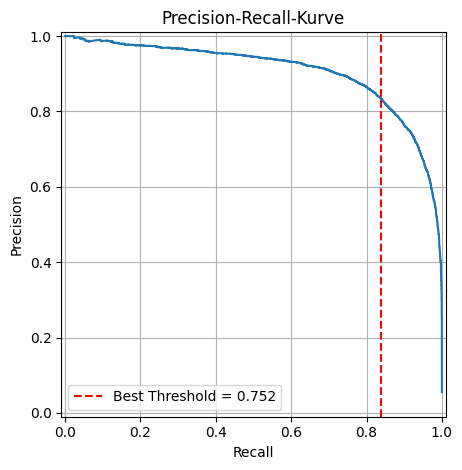

In [9]:
from sklearn.metrics import precision_recall_curve, f1_score, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Wahrscheinlichkeiten auf Trainingsdaten berechnen
y_proba_train = best_model.predict_proba(X)[:, 1]

# 2. PR-Kurve berechnen
precisions, recalls, thresholds = precision_recall_curve(y, y_proba_train)

# 3. F1-Scores für alle Schwellen berechnen
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # +epsilon gegen 0-Teiler

# 4. Optimalen Threshold finden
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print(f"🔍 Bester Threshold (nach F1): {best_threshold:.3f}")
print(f"→ F1 bei diesem Threshold: {f1_scores[best_index]:.3f}")

# 5. PR-Kurve plotten
plt.figure(figsize=(7, 5))
PrecisionRecallDisplay(precision=precisions, recall=recalls).plot()
plt.axvline(recalls[best_index], color="red", linestyle="--", label=f"Best Threshold = {best_threshold:.3f}")
plt.title("Precision-Recall-Kurve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 6. Optional: Modell mit neuem Threshold auf Testdaten anwenden
y_test_pred_thresh = (y_test_proba >= best_threshold).astype(int)
df_submission["predicted_label_thresh"] = y_test_pred_thresh

**Interpretation:**
- High accuracy (90%) is misleading due to class imbalance.
- ROC AUC of 0.81 indicates good overall ranking ability.
- However, low precision and recall show that fraud cases are still difficult to identify reliably.

---
```
Accuracy           : 0.903 ± 0.001\
Balanced Accuracy  : 0.674 ± 0.007\
Precision          : 0.264 ± 0.006\
Recall             : 0.417 ± 0.015\
F1-Score           : 0.323 ± 0.009\
ROC AUC            : 0.809 ± 0.007\
Average Precision  : 0.268 ± 0.010\
Log Loss           : -0.255 ± 0.001\
Matthews Corr. Coeff (MCC): 0.282 ± 0.010\
```

---

### 3. Threshold Optimization via Precision-Recall Curve

We plotted a precision-recall curve using predicted probabilities from the training set.  
The **optimal classification threshold** based on **maximum F1-score** was found to be:

---

### 4. Integration of Optimized Threshold in Prediction

Instead of using the default threshold of 0.5, we modified the final prediction logic to use the optimized threshold:

```python
y_pred = (y_proba >= 0.752).astype(int)